# K-Means Clustering

# 1) Use the "Breast Cancer Wisconsin (Diagnostic) Data Set" from Kaggle to try and cluster types of cancer cells. 

Here's the original dataset for your reference:

<https://www.kaggle.com/uciml/breast-cancer-wisconsin-data>

## This is a supervised learning dataset

(Because it has **labels** - The "diagnosis" column.)

In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA # You don't necessarily have to use this
from sklearn.cluster import KMeans # You don't necessarily have to use this
from sklearn.preprocessing import StandardScaler # You don't necessarily have to use this

df1 = pd.read_csv("https://raw.githubusercontent.com/ryanleeallred/datasets/master/Cancer_Cells.csv")
print(df1.shape)
df1['diagnosis']= df1['diagnosis'].astype('category')
df1['diagnosis'] = df1['diagnosis'] .cat.codes 
df1.head()

(569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# 1 = Malignant, 0 = Benign

## Now it's an unsupervised learning dataset

(Because we've removed the diagnosis label) - Use this version.

In [148]:
df = df1.drop(['diagnosis','Unnamed: 32','id'], axis=1)
df.head()




,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Let's do it!

- You might want to do some data exploration to see if you can find specific columns that will help you find distinct clusters of cells
- You might want to use the elbow method to decide on the number of clusters to use.


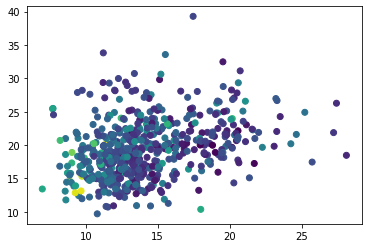

In [139]:
plt.scatter(df['radius_mean'], df['texture_mean'], c=df['fractal_dimension_mean'])

##Elbow method -- we will chart a sum of square distances for n of clusters K from 1 to 30-smth (the length of our dataset). 

####We find K-means metrics for each k values, and plot it. When there's a sharp transition (which we do not really have on this graph) -- we would know that's our thing. 

What's inertia? It is how on far on avg the points are from the cluster center

In [0]:
#Elbow method graph
from sklearn.cluster import KMeans 


sum_of_squared_distances = []
K = range(1,df1.shape[1])
for k in K: 
  km = KMeans(n_clusters=k)
  km=km.fit(df)
  sum_of_squared_distances.append(km.inertia_)

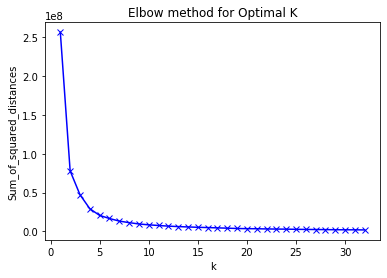

In [146]:
plt.plot(K, sum_of_squared_distances, 'bx-')  #K is a step and a number of variables in our array from before
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow method for Optimal K')
plt.show()

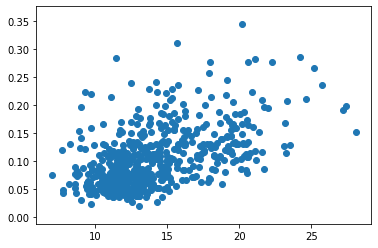

In [168]:
#Let's plot two variables so that we can do a viz with clusters on them later

plt.scatter(df['radius_mean'], df['compactness_mean']);


###Perform K-Means Clustering on the Dataset

In [170]:
from sklearn.cluster import KMeans 

kmeans = KMeans(n_clusters=2) #based on the elbow test above
kmeans.fit(df[['radius_mean', 'compactness_mean']])
labels = kmeans.labels_

print(labels)

[1 1 1 0 1 0 1 0 0 0 1 0 1 1 0 0 0 1 1 0 0 0 0 1 1 1 0 1 0 1 1 0 1 1 1 1 0
 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0
 0 1 0 1 1 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 1 1 0 0
 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 0 1 0 0
 0 1 1 1 0 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 1
 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0
 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 0 1 0 1 1 

In [176]:
#Add labels to the dataframe: 

new_series = pd.Series(labels)
df1['clusters_no_PCA']=new_series.values

print(df1.shape)
df1.head()

(569, 34)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32,clusters_no_PCA
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN,1
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN,1
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN,1
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN,0
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN,1


## Check you work: 

This is something that in a truly unsupervised learning situation **WOULD NOT BE POSSIBLE**. But for educational purposes go back and grab the true diagnosis column (label) from the original dataset. Take your cluster labels and compare them to the original diagnosis column. You can make scatterplots for each to see how they compare or you can calculate a percent accuracy score like: 
\begin{align}
\frac{\text{Num Correct Labels}}{\text{Num Total Observations}}
\end{align}

In [177]:
pd.crosstab(df1['clusters_no_PCA'], df1['diagnosis'], margins=True)

diagnosis,0,1,All
clusters_no_PCA,,,
0,351,76,427
1,6,136,142
All,357,212,569


In [175]:
(351+136)/569

0.8558875219683656

In [186]:
((df1['clusters_no_PCA'] == df1['diagnosis']).value_counts())[1]/len(df1)

0.8558875219683656

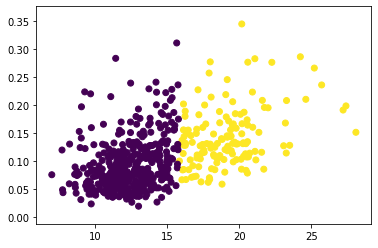

In [187]:
plt.scatter(df1['radius_mean'], df1['compactness_mean'], c=df1['clusters_no_PCA']);


###Accuracy: 85% 

# 2) Perform PCA on your dataset first and *then* use k-means clustering. 

- You need to standardize your data before PCA.
- First try clustering just on PC1 and PC2 so that you can make a scatterplot of your clustering.
- Then use use a scree plot to decide how many principal components to include in your clustering, and use however many principal components you need in order to retain 90% of the variation of the original dataset



In [200]:

# PCA on 2 variables 
X = df  #Original df

#Standardize data
scaler = StandardScaler() #Call method
Z = scaler.fit_transform(X) #Get standardized matrix in the form of array (each column is: subtract mean from each value, divide by SD)
#Goes mostly from -3 to 3. 

#Perform PCA 
pca = PCA(2) #Call method 
pca.fit(Z) #Fit it over standardized matrix 
#print(pca.components_) #These are the weights of all of my columns in my new 2 variables PC1 and PC2, They are Eigenvectors, defining my transformation. 
#print(pca.explained_variance_) #Eigen numbers, defining how much eigenvectors will be stretched
B=pca.transform(Z) #Transformed matrix with only 2 columns and new values of our columns

B

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       ...,
       [ 1.25617928, -1.90229671],
       [10.37479406,  1.67201011],
       [-5.4752433 , -0.67063679]])

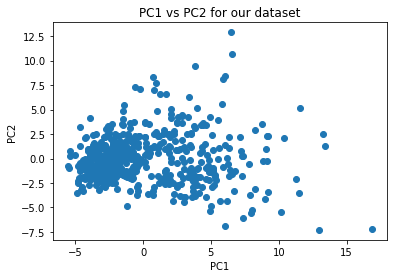

In [110]:
plt.scatter(B[:,0:1], B[:,1:2])
plt.title('PC1 vs PC2 for our dataset')
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.show()



In [0]:
#Run a clustering algorithm on it: 

kmeans = KMeans(n_clusters=2)
kmeans.fit(B)
labels = kmeans.labels_
#print(labels)

In [201]:
#Visuzlize it by adding cluster value to my scatterplot of the PC1 and PC2
new_series = pd.Series(labels)
result2 = pd.concat([pd.DataFrame(B), new_series], axis=1)
result2.columns = np.array(['pc1', 'pc2', 'cluster'])
result2.head()

,pc1,pc2,cluster
0,9.192837,1.948583,1
1,2.387802,-3.768172,1
2,5.733896,-1.075174,1
3,7.122953,10.275589,1
4,3.935302,-1.948072,1


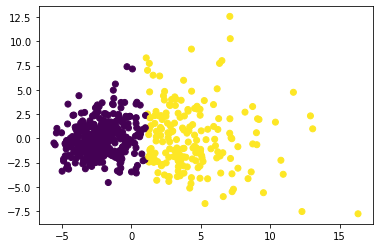

In [202]:
plt.scatter(result2['pc1'], result2['pc2'], c=result2['cluster']);

###Check the accuracy (where diagnosis is the cluster)

In [204]:
df1['clusters_with_PCA_2'] = result2['cluster']
pd.crosstab(df1['clusters_with_PCA_2'], df1['diagnosis'], margins = True)

diagnosis,0,1,All
clusters_with_PCA_2,,,
0,341,37,378
1,16,175,191
All,357,212,569


In [205]:
(341+175)/569

0.9068541300527241

In [206]:
(df1[df1['clusters_with_PCA_2']==df1['diagnosis']].shape[0])/df1.shape[0]

0.9068541300527241

###90.6% accurate with 2 PCA variables

##3 K-means on a dataset with the optimal number of PC variables 

In [208]:
#Create a scree plot associated with the dataset: 

# I can re-use the matrix Z from the previous step: 
# PCA on 2 variables 
X = df  #Original df

#Standardize data
scaler = StandardScaler() #Call method
Z = scaler.fit_transform(X) #Get standardized matrix in the form of array (each column is: subtract mean from each value, divide by SD)
#Goes mostly from -3 to 3. 

#Perform PCA 
pca = PCA() #Call method 
pca.fit(Z) #Fit it over standardized matrix 
#print(pca.components_) #These are the weights of all of my columns in my new 2 variables PC1 and PC2, They are Eigenvectors, defining my transformation. 
#print(pca.explained_variance_) #Eigen numbers, defining how much eigenvectors will be stretched

#B=pca.transform(Z) #Transformed matrix with only 2 columns and new values of our columns

pca.explained_variance_ratio_

array([4.42720256e-01, 1.89711820e-01, 9.39316326e-02, 6.60213492e-02,
       5.49576849e-02, 4.02452204e-02, 2.25073371e-02, 1.58872380e-02,
       1.38964937e-02, 1.16897819e-02, 9.79718988e-03, 8.70537901e-03,
       8.04524987e-03, 5.23365745e-03, 3.13783217e-03, 2.66209337e-03,
       1.97996793e-03, 1.75395945e-03, 1.64925306e-03, 1.03864675e-03,
       9.99096464e-04, 9.14646751e-04, 8.11361259e-04, 6.01833567e-04,
       5.16042379e-04, 2.72587995e-04, 2.30015463e-04, 5.29779290e-05,
       2.49601032e-05, 4.43482743e-06])

Text(0.5, 1.0, 'Explained Variance Per Principal Component')

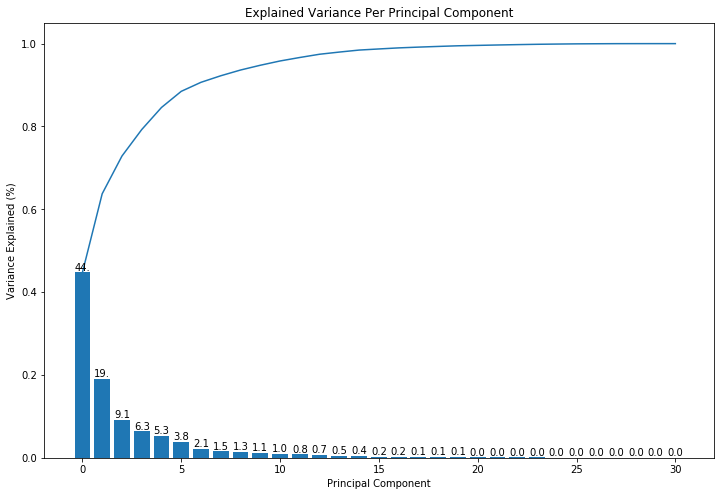

In [84]:
#Build scree plot step by step 

num_components=len(pca.explained_variance_ratio_)
ind = np.arange(num_components)
vals = pca.explained_variance_ratio_

fig, ax = plt.subplots(figsize=(12,8))
cumvals = np.cumsum(vals)
ax.bar(ind,vals)
ax.plot(ind,cumvals)
for i in range(num_components):
   ax.annotate(r"%s" % ((str(vals[i]*100)[:3])), (ind[i], vals[i]), va="bottom", ha="center", fontsize=10)

ax.set_xlabel("Principal Component")
ax.set_ylabel("Variance Explained (%)")
plt.title('Explained Variance Per Principal Component')

###As we can see, first 7 components give me a varience of >90%. So I need to run PCA(7)



In [211]:
#Running PCA on first 7 components: 
pca.explained_variance_ratio_[:7].sum()

0.9100953006967308

In [0]:
pca = PCA(7)
pca_features = pca.fit_transform(Z)
#print(pca.components_)
#print(pca.explained_variance_)
B=pca.transform(Z)


In [215]:
#Run clustering on the transformed after PCA dataset with 7 variables, 2 clusters: 

from sklearn.cluster import KMeans 
kmeans = KMeans(n_clusters=2)
kmeans.fit(B)
labels = kmeans.labels_
print(labels)


[0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 0 1 1 0 0 1 1 1 1 0 1 0 0 1 1 0 1 0 1 0 1
 1 0 1 0 0 1 1 0 0 0 1 0 1 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1
 1 0 1 1 1 1 0 0 1 1 0 0 1 1 1 1 0 0 0 1 0 0 1 0 1 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 0 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 1 0 1 1 1 1 0 1 1 0 0 1 1 1
 1 1 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 1 1 1 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 0 1 0 0 0
 0 0 1 0 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 0 1 1
 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 0 1 0 1 1 1 1 0 

## Check your work: 

- Compare your PC1, PC2 clustering scatterplot to the clustering scatterplots you made on the raw data
- Calculate accuracy scores for both the PC1,PC2 Principal component clustering and the 90% of explained variance clustering.

How do your accuracy scores -when preprocessing the data with PCA- compare to the accuracy when simply clustering on the raw data?

In [0]:
new_series = pd.Series(labels)
df1['pca_7'] = new_series


In [220]:
pd.crosstab(df1['diagnosis'], df1['pca_7'], margins=True)

pca_7,0,1,All
diagnosis,,,
0,14,343,357
1,175,37,212
All,189,380,569


In [221]:
#Let's check the accuracy: 85% 

(343+175)/569


0.9103690685413005

### 91% accurate with 7 variables

# Stretch Goals:

- Study for the Sprint Challenge
- Work on your Data Storytelling Project